This notebook examines whether the pre-distraction pause has an effect on either photometry response to distractors or if it is related to the post-distraction pause. The first figures show, for each rat, the average photometry response on distraction trials when the pre-distraction pause was >5s (left) vs those when the pre-distraction pause was >5s (right). There does not appear to be a large difference - at least based on the mean. (NB all this analysis is perfomred on distraction day when distractors were present.

Below, I have regressed pre-distraction pause against post-distraction pause (collapsing all trials from all rats) and find no relationship.

At the end is a comparison of the pre-distraction pause on distracted and not distracted trials. There is no statistical difference when assessed with a paired t-text.

In [1]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

import trompy as tp

%matplotlib inline

# %run "..//JM_custom_figs.py"

In [2]:
# fig settings
scattersize=50

In [3]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [6]:
rat = 'thph1.1'
d = disDict[rat]
d.keys()

dict_keys(['rat', 'fs', 'tick', 'filt_sd', 'licks', 'licks_off', 'distractors', 'distracted', 'notdistracted', 'd_bool_array', 'pdp', 'pre_dp', 'lickdata', 'snips_distractors', 'snips_distracted', 'snips_not-distracted'])

In [7]:
long_pre_dp_snips = []
short_pre_dp_snips = []

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    L_predp = np.array([pre_dp > 5 for pre_dp in d['pre_dp']], dtype=bool)

    long_pre_dp_snips.append(np.mean([snip for snip, L in zip(d['snips_distractors']['filt_z'],
                                         L_predp) if L], axis=0))
    short_pre_dp_snips.append(np.mean([snip for snip, L in zip(d['snips_distractors']['filt_z'],
                                     L_predp) if not L], axis=0))

In [8]:
f, ax = plt.subplots(ncols=3, figsize=(12,5), sharey=True)
for avgsnip in long_pre_dp_snips:
    ax[0].plot(avgsnip, color='k', alpha=0.2)
ax[0].plot(np.mean(long_pre_dp_snips, axis=0), color='k', linewidth=2)

for avgsnip in short_pre_dp_snips:
    ax[1].plot(avgsnip, color='k', alpha=0.2)
ax[1].plot(np.mean(short_pre_dp_snips, axis=0), color='k', linewidth=2)

ax[0].set_ylabel('Z-score')

for axis in [ax[0], ax[1]]:
    xticks=[0, 50, 100, 150, 200]
    axis.set_xticks(xticks)
    axis.set_xticklabels([str(x/10-5) for x in xticks])
    axis.set_xlabel('Time from distractor (s)')
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

peak_data = []
peak_data.append([np.max(snip[50:80]) for snip in long_pre_dp_snips])
peak_data.append([np.max(snip[50:80]) for snip in short_pre_dp_snips])
barscatter(peak_data, ax=ax[2], paired=True, barfacecolor=['white', 'xkcd:light grey'], barfacecoloroption = 'individual')

ax[2].set_xticks([1,2])
ax[2].set_xticklabels(['Long', 'Short'])
ax[2].set_title('Peak Z-score')
    
ax[0].set_title('Long pre-dps')
ax[1].set_title('Short pre-dps')

f.savefig(outputfolder + "short-vs-long predps.png")

In [9]:
all_pre_dps = []
all_post_dps =[]

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    all_pre_dps.append(d['pre_dp'])
    all_post_dps.append(d['pdp'])
    
all_pre_dps = tp.flatten_list(all_pre_dps)
all_post_dps = tp.flatten_list(all_post_dps)

In [10]:


x = all_pre_dps
y = all_post_dps

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

f, ax = plt.subplots(figsize=(6,6))

#ax.scatter(x, y)
ax.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
# ax.set_yscale('log')
# ax.set_xscale('log')

ax.set_xlabel('Pre-distraction pauses (s)')
ax.set_ylabel('Post-distraction pauses (s)')

f.savefig(outputfolder + "predps-vs-postdps.png")


In [11]:
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=0.007618716364670469, intercept=18.81412605884071, rvalue=0.011331495932338636, pvalue=0.7581223849372338, stderr=0.02473115817489556)

In [4]:
pre_dps_distracted = []
pre_dps_notdistracted =[]

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    
    pre_dps = [x for x, L in zip(d['pre_dp'], d["d_bool_array"]) if not L]
    pre_dps_notdistracted.append(np.mean(pre_dps))
    
    pre_dps = [x for x, L in zip(d['pre_dp'], d["d_bool_array"]) if L]
    pre_dps_distracted.append(np.mean(pre_dps))


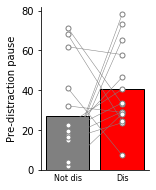

In [5]:
f, ax = plt.subplots(figsize=(3,3))
f.subplots_adjust(left=0.4)
_, barx, _, _ = tp.barscatter([pre_dps_notdistracted, pre_dps_distracted], paired=True,
            barfacecolor=["grey", "red"], barfacecoloroption='individual',
            barlabels=['Not dis', 'Dis'],
#            barlabeloffset=-0.04,
           scattersize=scattersize,
           ax=ax)

ax.set_ylabel("Pre-distraction pause")
# ax.set_ylim([-0.05, 1.1])

f.savefig(figfolder + "pre-dps_bar.pdf")

In [28]:
from scipy.stats import ttest_rel as ttest


print("Pre-distraction pause on not distracted trials is ", tp.mean_and_sem(pre_dps_notdistracted))
print("Pre-distraction pause on distracted trials is ", tp.mean_and_sem(pre_dps_distracted))

print(ttest(pre_dps_distracted, pre_dps_notdistracted))

Pre-distraction pause on not distracted trials is  (27.09766153762237, 6.3036937820589936)
Pre-distraction pause on distracted trials is  (40.715433266782604, 5.349025459382006)
Ttest_relResult(statistic=1.3541045074093196, pvalue=0.19877449969477584)
